In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler
label_encoder=LabelEncoder()
oh_encoder=OneHotEncoder()
scaler=MinMaxScaler()
from sklearn.model_selection import train_test_split
import time
import pickle
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('final_destination2.csv')

In [4]:
data.shape

(19000, 118)

In [5]:
data['source'].value_counts()

philips_sec_cam     8000
security_cam        4000
danmini_doorbell    4000
samsung             3000
Name: source, dtype: int64

In [7]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,2.979897,456.515870,371.700595,2.987890,456.443004,372.715178,2.995948,456.369841,373.755653,4.000143,...,15.974548,456.333476,19.344776,456.333476,3.742204e+02,0.000000e+00,0.000000e+00,samsung,benign,None
1,1.000000,429.000000,0.000133,1.000004,428.998549,0.535599,1.016685,423.005222,2162.062877,3.241126,...,13.978410,454.377983,19.926723,454.377983,3.970743e+02,0.000000e+00,0.000000e+00,samsung,benign,None
2,1.000000,429.000000,0.000000,1.000000,429.000000,0.000006,1.000370,428.864646,49.695641,2.666670,...,13.980002,454.378263,19.926658,454.378263,3.970717e+02,0.000000e+00,0.000000e+00,samsung,benign,None
3,3.363795,428.064755,6678.795429,3.549155,416.732858,8746.940648,3.820229,401.982767,11056.308330,5.111517,...,15.978757,456.333422,19.344796,456.333422,3.742211e+02,0.000000e+00,0.000000e+00,samsung,benign,None
4,1.000000,60.000001,0.000179,1.000044,60.002257,0.300567,1.055247,63.499012,467.375232,3.200599,...,4.907064,60.000000,0.000001,84.852814,1.440000e-12,-8.350000e-30,-1.060000e-17,samsung,benign,None


In [55]:
data=data.sample(frac=1).reset_index(drop=True)

In [56]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,156.190625,74.004701,0.113284,264.812857,74.012848,0.394270,809.312031,74.064328,10.045754,4289.545993,...,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000e+00,0.0,samsung,attack,gafgyt
1,1.999893,330.000000,0.000000,1.999936,330.000000,0.000000,1.999980,329.999850,0.040584,2.738291,...,6.273792,330.000000,0.000007,431.490440,4.370000e-11,1.250000e-26,0.0,security_cam,benign,None
2,171.173878,273.479685,62447.144692,255.671444,304.861269,63942.757146,670.859283,357.684114,62011.765771,6379.792304,...,1.000000,566.000000,0.000000,566.000000,0.000000e+00,0.000000e+00,0.0,philips_sec_cam,attack,mirai
3,1.999845,449.001416,400.052998,2.000111,448.961371,415.267526,2.058881,437.926823,4551.371875,3.721299,...,14.977934,455.354243,19.592984,455.354243,3.838850e+02,0.000000e+00,0.0,samsung,benign,None
4,1.990930,449.091115,399.991698,1.994548,449.054669,399.997116,1.999352,448.791962,487.262627,3.754564,...,14.973470,455.353983,19.593039,455.353983,3.838872e+02,0.000000e+00,0.0,samsung,benign,None


# Data Preprocessing
1. Encoding the Categorical Variables
2. Scaling all numerical variables using Standard Scaler and Robust Scalers
3. Removing instances of Low Counts

# Data Encoding

In [59]:
temp=data.copy()

In [9]:
#plt.figure(figsize=(12,12))
#sns.heatmap(temp.corr())

In [60]:
encoder=LabelEncoder()

In [61]:
temp['output']=encoder.fit_transform(data['output'])

In [12]:
temp.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,2.979897,456.515870,371.700595,2.987890,456.443004,372.715178,2.995948,456.369841,373.755653,4.000143,...,15.974548,456.333476,19.344776,456.333476,3.742204e+02,0.000000e+00,0.000000e+00,samsung,1,None
1,1.000000,429.000000,0.000133,1.000004,428.998549,0.535599,1.016685,423.005222,2162.062877,3.241126,...,13.978410,454.377983,19.926723,454.377983,3.970743e+02,0.000000e+00,0.000000e+00,samsung,1,None
2,1.000000,429.000000,0.000000,1.000000,429.000000,0.000006,1.000370,428.864646,49.695641,2.666670,...,13.980002,454.378263,19.926658,454.378263,3.970717e+02,0.000000e+00,0.000000e+00,samsung,1,None
3,3.363795,428.064755,6678.795429,3.549155,416.732858,8746.940648,3.820229,401.982767,11056.308330,5.111517,...,15.978757,456.333422,19.344796,456.333422,3.742211e+02,0.000000e+00,0.000000e+00,samsung,1,None
4,1.000000,60.000001,0.000179,1.000044,60.002257,0.300567,1.055247,63.499012,467.375232,3.200599,...,4.907064,60.000000,0.000001,84.852814,1.440000e-12,-8.350000e-30,-1.060000e-17,samsung,1,None


## One Hot Encoding the Data Sources

In [63]:
temp2=pd.get_dummies(temp,columns=['source'])

In [64]:

temp=temp2

In [65]:
temp=temp.sample(frac=1)

In [66]:
temp.reset_index(inplace=True)

In [67]:
X=temp.drop(['output','attack_type'],axis=1)
y=temp['output']

# Scaling

In [69]:
X[X.columns[:115]]=scaler.fit_transform(X[X.columns[:115]])

In [70]:
X.drop('index',axis=1,inplace=True)

In [22]:
#X

In [23]:
"""desc=X.describe()
for col in X.columns:
    print(col,desc.at['min',col])"""

"desc=X.describe()\nfor col in X.columns:\n    print(col,desc.at['min',col])"

In [24]:
print(X.dtypes)

MI_dir_L5_weight           float64
MI_dir_L5_mean             float64
MI_dir_L5_variance         float64
MI_dir_L3_weight           float64
MI_dir_L3_mean             float64
                            ...   
HpHp_L0.01_pcc             float64
source_danmini_doorbell      uint8
source_philips_sec_cam       uint8
source_samsung               uint8
source_security_cam          uint8
Length: 119, dtype: object


In [71]:
from sklearn.model_selection import train_test_split


In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logreg=LogisticRegression()

In [85]:
X_train=X_train.to_numpy()

In [86]:
y_train=y_train.to_numpy()

# Feature Selection on the IOT Botnet Dataset

In [87]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction

In [88]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
model = LogisticRegression(solver='lbfgs')
fsga = FeatureSelectionGA(model,X_train,y_train, ff_obj = FitnessFunction())

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FeatureSelect' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [89]:
pop=fsga.generate(50)

EVOLVING.......
-- GENERATION 1 --
Evaluated 32 individuals
-- GENERATION 2 --
Evaluated 31 individuals
-- GENERATION 3 --
Evaluated 31 individuals
-- GENERATION 4 --
Evaluated 26 individuals
-- GENERATION 5 --
Evaluated 32 individuals
-- Only the fittest survives --
Best individual is [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], (0.9999298245614036,)


In [38]:
data.shape

(19000, 118)

In [90]:

final_pop= [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
selected_cols=[]
for idx in range(len(final_pop)):
    if final_pop[idx]==1:
        selected_cols.append(X.columns[idx])

In [91]:
selected_cols

['MI_dir_L5_mean',
 'MI_dir_L5_variance',
 'MI_dir_L3_weight',
 'MI_dir_L1_weight',
 'MI_dir_L0.1_mean',
 'MI_dir_L0.01_mean',
 'MI_dir_L0.01_variance',
 'H_L5_weight',
 'H_L3_weight',
 'H_L3_variance',
 'H_L1_weight',
 'H_L1_mean',
 'H_L0.1_weight',
 'H_L0.1_variance',
 'H_L0.01_weight',
 'H_L0.01_variance',
 'HH_L5_mean',
 'HH_L5_std',
 'HH_L5_magnitude',
 'HH_L5_covariance',
 'HH_L5_pcc',
 'HH_L3_weight',
 'HH_L3_std',
 'HH_L3_magnitude',
 'HH_L3_radius',
 'HH_L1_magnitude',
 'HH_L0.1_weight',
 'HH_L0.1_mean',
 'HH_L0.1_std',
 'HH_L0.1_magnitude',
 'HH_L0.1_radius',
 'HH_L0.1_covariance',
 'HH_L0.01_std',
 'HH_L0.01_magnitude',
 'HH_jit_L5_mean',
 'HH_jit_L5_variance',
 'HH_jit_L3_weight',
 'HH_jit_L3_variance',
 'HH_jit_L1_mean',
 'HH_jit_L0.1_weight',
 'HH_jit_L0.1_mean',
 'HH_jit_L0.01_weight',
 'HH_jit_L0.01_mean',
 'HpHp_L5_mean',
 'HpHp_L3_mean',
 'HpHp_L3_covariance',
 'HpHp_L3_pcc',
 'HpHp_L1_std',
 'HpHp_L1_covariance',
 'HpHp_L1_pcc',
 'HpHp_L0.1_weight',
 'HpHp_L0.1_magni

In [14]:
sum([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0])

60

In [92]:
model=LogisticRegression(solver='lbfgs')

In [93]:
temp_Xtrain=pd.DataFrame(X_train,columns=X.columns)

In [94]:
X_test_subset=X_test[selected_cols]
X_train_subset=temp_Xtrain[selected_cols]

In [95]:
model.fit(X_train_subset,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
preds=model.predict(X_test_subset)

In [97]:
len(selected_cols)

60

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2238
           1       1.00      1.00      1.00      2512

    accuracy                           1.00      4750
   macro avg       1.00      1.00      1.00      4750
weighted avg       1.00      1.00      1.00      4750



<AxesSubplot:xlabel='H_L0.1_weight', ylabel='HpHp_L0.1_magnitude'>

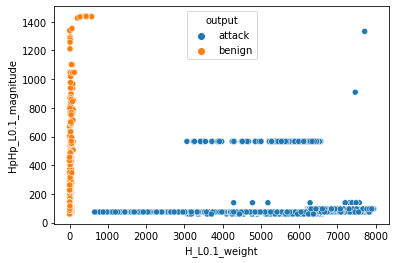

In [118]:
num1=12
num2=51
sns.scatterplot(x=selected_cols[num1],y=selected_cols[num2],hue='output',data=data)

In [105]:
data['output'].value_counts()

benign    10000
attack     9000
Name: output, dtype: int64

# Test on a set of 2 features

In [119]:
test=temp[[selected_cols[num1],selected_cols[num2],'output']]

In [120]:
test.head()

,H_L0.1_weight,HpHp_L0.1_magnitude,output
0,7598.895006,74.000000,0
1,7180.838896,95.268043,0
2,2.910554,431.490440,1
3,2.730297,431.490440,1
4,9.305787,116.057165,1


In [121]:
X=test.drop('output',axis=1)
y=test['output']
X_train,X_test,y_train,y_test=train_test_split(X,y)
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2241
           1       1.00      1.00      1.00      2509

    accuracy                           1.00      4750
   macro avg       1.00      1.00      1.00      4750
weighted avg       1.00      1.00      1.00      4750



In [62]:
tempx=pd.DataFrame(X)

In [64]:
tempx.describe()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
count,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9.500000e+03,9500.000000,9500.000000,9.500000e+03,9.500000e+03,...,9500.000000,9.500000e+03,9500.000000,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,4.432100e-01,0.424280,3.773174,0.452177,0.423198,3.048743e+00,0.485475,0.384922,2.485858e+00,4.865139e-01,...,0.421233,7.503808e+00,0.296221,2.364990e+01,-0.000176,0.003476,0.210526,0.421053,0.157895,0.210526
std,5.004530e-01,0.649124,9.470276,0.501168,0.631599,7.126274e+00,0.526319,0.563163,5.275627e+00,5.261389e-01,...,0.733515,2.717888e+01,0.569562,1.690988e+02,0.015585,0.042702,0.407704,0.493754,0.364661,0.407704
min,-1.971530e-02,-0.062426,-0.000313,-0.014469,-0.064137,-5.524442e-04,-0.005826,-0.065184,-1.364356e-02,-2.188621e-03,...,-0.053270,-8.080768e-07,-0.159943,-5.043427e-15,-0.697674,-0.589781,0.000000,0.000000,0.000000,0.000000
25%,-1.910876e-02,-0.008000,-0.000313,-0.013380,-0.009580,-5.497041e-04,-0.004614,-0.014873,-1.340195e-02,-1.572453e-03,...,-0.026441,-8.080768e-07,-0.088246,-5.043427e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.718947e-18,0.000000,0.000000,0.000000,0.000000,-4.501682e-20,0.000000,0.000000,-9.931461e-19,-1.359488e-19,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.808912e-01,0.992000,0.999687,0.986620,0.990420,9.994503e-01,0.995386,0.985127,9.865981e-01,9.984275e-01,...,0.973559,9.999992e-01,0.911754,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.962096e+00,5.373480,152.983932,1.630330,5.363202,1.062896e+02,1.310967,4.851360,7.328584e+01,1.251246e+00,...,5.177891,5.419436e+02,3.810602,2.368760e+03,0.302326,0.410219,1.000000,1.000000,1.000000,1.000000


# KDD

In [7]:
names="""duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous."""
names=names.split("\n")

In [8]:
final_names=[]
for obj in names:
    idx=obj.index(":")
    colname=obj[:idx]
    final_names.append(colname)

In [9]:
final_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [9]:
len(final_names)

41

In [10]:
final_names.append('output')
kdd=pd.read_csv('kddcup.data_10_percent/kddcup.data_10_percent_corrected',names=final_names)

In [11]:
kdd.shape

(494021, 42)

In [13]:
len(kdd['output'].value_counts())

23

# Data Preprocessing on the KDD Dataset

In [24]:
len(kdd['protocol_type'].value_counts())

3

In [23]:
len(kdd['service'].value_counts())

66

In [22]:
len(kdd['flag'].value_counts())

11

In [14]:
temp=kdd.copy()

In [15]:
categoricals=['output','protocol_type','service','flag']
continuous=temp.drop(categoricals,axis=1).columns

In [16]:
temp[continuous]=scaler.fit_transform(temp[continuous])

In [17]:
label_encoder=LabelEncoder()

In [18]:
temp['output']=label_encoder.fit_transform(temp['output'])

In [12]:
temp2=pd.get_dummies(temp,columns=['protocol_type'])
temp=temp2

In [13]:
label_encoder=LabelEncoder()
temp['service']=label_encoder.fit_transform(temp['service'])

In [14]:
label_encoder=LabelEncoder()
temp['flag']=label_encoder.fit_transform(temp['flag'])

In [24]:
temp.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.0,22,9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,...,0.11,0.0,0.0,0.0,0.0,0.0,11,0,1,0
1,0.0,22,9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,11,0,1,0
2,0.0,22,9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
3,0.0,22,9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
4,0.0,22,9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,11,0,1,0


In [28]:
temp.shape

(494021, 44)

In [113]:
mini_temp=temp.sample(n=20000,random_state=40)

In [114]:
mini_temp.reset_index(drop=True,inplace=True)
mini_temp.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.000000,45,5,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,9,0,1,0
1,0.081829,40,9,2.120063e-07,0.00002,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,11,0,0,1
2,0.000000,14,9,1.488371e-06,0.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18,1,0,0
3,0.000000,14,9,1.488371e-06,0.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18,1,0,0
4,0.000000,14,9,1.488371e-06,0.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18,1,0,0


In [116]:
mini_temp['class_label']=mini_temp['output'].apply(lambda x: is_intrusion(x))

In [117]:
mini_temp['class_label'].value_counts()

1    16143
0     3857
Name: class_label, dtype: int64

# Counting the Instances of each Target Class

In [142]:
temp['output'].value_counts().sort_values()

19         2
12         3
13         4
8          7
2          8
7          9
16        10
4         12
22        20
6         21
1         30
3         53
10       231
14       264
20       979
21      1020
15      1040
5       1247
17      1589
0       2203
11     97278
9     107201
18    280790
Name: output, dtype: int64

# Removing instances of low counts

In [15]:
remove_labels=[19,12,13,8,2,7]
remove_idx=[]
for idx in range(temp.shape[0]):
    if temp.iloc[idx]['output'] in remove_labels:
        remove_idx.append(idx)

In [16]:
temp.drop(remove_idx,inplace=True)

In [143]:
temp.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.0,22,9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,...,0.11,0.0,0.0,0.0,0.0,0.0,11,0,1,0
1,0.0,22,9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,11,0,1,0
2,0.0,22,9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
3,0.0,22,9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
4,0.0,22,9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,11,0,1,0


In [17]:
X=temp.drop(['output','service'],axis=1)
y=temp['output']
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Feature Selection on the KDD Dataset

In [157]:
tree_model=RandomForestClassifier()

In [158]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
fsga = FeatureSelectionGA(tree_model,X_train.to_numpy(),y_train.to_numpy(), ff_obj = FitnessFunction())

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FeatureSelect' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [130]:
a=time.time()

In [128]:
import time

In [159]:
start=time.time()
pop=fsga.generate(50)

EVOLVING.......


c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-- GENERATION 1 --
Evaluated 26 individuals
-- GENERATION 2 --
Evaluated 29 individuals
-- GENERATION 3 --
Evaluated 34 individuals
-- GENERATION 4 --
Evaluated 32 individuals
-- GENERATION 5 --
Evaluated 30 individuals
-- Only the fittest survives --
Best individual is [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], (0.9996545125252705,)


In [15]:
f=[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
print("total number of feats",len(f), "num of selected feats",sum(f))

total number of feats 42 num of selected feats 26


In [160]:
end=time.time()


In [162]:
end=time.time()

print((end-start)/60.0,'minutes')

44.25656646887462 minutes


# Selected Features

In [19]:
features=X_train.columns
selected_feats=[]
bestpop= [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
for idx in range(len(bestpop)):
    if bestpop[idx]==1:
        selected_feats.append(features[idx])

In [165]:
final_model=RandomForestClassifier()

In [166]:
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]

# Results on 10000 samples

In [140]:
final_model.fit(X_train,y_train)
preds=final_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        12
           9       1.00      1.00      1.00      1091
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00       963
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         6
          17       1.00      0.91      0.95        11
          18       1.00      1.00      1.00      2872
          20       1.00      1.00      1.00         7
          21       1.00      0.70      0.82        10

    accuracy                           1.00      4999
   macro avg       0.99      0.96      0.98      4999
weighted avg       1.00      1.00      1.00      4999



c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [172]:
temp.shape

(493988, 44)

In [171]:

len(selected_feats)

26

# Result on Full Dataset

In [167]:
final_model.fit(X_train,y_train)
preds=final_model.predict(X_test)
print(classification_report(y_test,preds))

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      0.43      0.60         7
           3       1.00      1.00      1.00        12
           4       1.00      0.50      0.67         2
           5       1.00      0.99      1.00       314
           6       0.75      1.00      0.86         3
           9       1.00      1.00      1.00     26855
          10       0.93      0.96      0.95        54
          11       1.00      1.00      1.00     24364
          14       1.00      1.00      1.00        58
          15       1.00      1.00      1.00       252
          16       1.00      0.33      0.50         3
          17       0.99      0.97      0.98       397
          18       1.00      1.00      1.00     70126
          20       1.00      1.00      1.00       231
          21       0.99      0.98      0.98       260
          22       1.00      0.67      0.80         9

    accuracy              

# Feature Reduction: Second Run

In [35]:
classifier2=RandomForestClassifier()

In [36]:
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]

In [37]:
X_train.head()

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,logged_in,su_attempted,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,protocol_type_icmp
46359,0.0,9,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.0,1
490636,0.0,9,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.0,1
464634,0.0,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.07,0.0,1.0,0.07,0.0,0.0,0.0,0.0,1.0,0
205657,0.0,9,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.0,1
117745,0.0,5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.0,1.0,0.07,0.0,0.0,1.0,1.0,0.0,0


In [39]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
fsga = FeatureSelectionGA(classifier2,X_train.to_numpy(),y_train.to_numpy(), ff_obj = FitnessFunction())

In [42]:
start=time.time()
pop=fsga.generate(50)

EVOLVING.......


c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-- GENERATION 1 --
Evaluated 30 individuals
-- GENERATION 2 --
Evaluated 29 individuals
-- GENERATION 3 --
Evaluated 36 individuals
-- GENERATION 4 --
Evaluated 26 individuals
-- GENERATION 5 --
Evaluated 35 individuals
-- Only the fittest survives --
Best individual is [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], (0.9995816362610698,)


In [43]:
end=time.time()
print((end-start)/60.0,'minutes')

38.36158158779144 minutes


In [45]:
chosen_feats=[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [46]:
features=X_train.columns
selected_feats=[]
for idx in range(len(chosen_feats)):
    if bestpop[idx]==1:
        selected_feats.append(features[idx])

In [16]:
f=[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
print(len(f),sum(f))

26 20


## Second Feature Reduction Results

In [49]:
final_model_2=RandomForestClassifier()
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]
final_model_2.fit(X_train,y_train)
preds=final_model_2.predict(X_test)
print(classification_report(y_test,preds))

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      0.40      0.57         5
           3       1.00      0.91      0.95        11
           4       0.00      0.00      0.00         4
           5       0.91      0.99      0.94       309
           6       0.78      1.00      0.88         7
           9       1.00      1.00      1.00     26962
          10       0.96      0.53      0.69        45
          11       1.00      1.00      1.00     24188
          14       0.97      0.96      0.97        75
          15       1.00      1.00      1.00       255
          16       0.00      0.00      0.00         2
          17       1.00      0.96      0.98       425
          18       1.00      1.00      1.00     70149
          20       1.00      0.99      0.99       236
          21       0.98      0.95      0.96       259
          22       1.00      0.60      0.75         5

    accuracy              

In [ ]:
print(classification_report(y_test,preds))

In [170]:
filename='CN_randomforest.sav'
pickle.dump(final_model,open(filename,'wb'))

In [32]:
kdd.shape

(494021, 42)

In [33]:
data_new.shape

(493988, 27)